# **TELECOM CHURN CASE STUDY**


In [ ]:
%matplotlib inline
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, f1_score, plot_roc_curve 

#PCA
from sklearn.decomposition import PCA

#SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os

In [ ]:
# Read the data
df = pd.read_csv("train (1).csv")
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [ ]:
# Shape of the data
df.shape

(69999, 172)

In [ ]:
# Data Description
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [ ]:
# Create a copy of original data
churn_data = df.copy()

# High Value Customer

High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the good phase.

In [ ]:
# Though we have total amount of recharge for talktime we dont have that number for data, instead we have average and number of rechanrges
# so let's calculate that amount
churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']

# Drop the columns already accounted for 
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)

# Find Average recharge amount for good phase i.e 6th month
good_phase_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0)  +  churn_data['total_data_rech_amt_6'].fillna(0) ) 

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_rech_amt_70 = np.percentile(good_phase_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_rech_amt_70}')

# Keep high value customer data
churn_data = churn_data[good_phase_rech_amt >= gd_phase_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

70 Percentile of recharge amount is : 476.0
Shape of high value customer data: (21157, 169)


# Data Cleaning & EDA

In [ ]:
rech_col = [col for col in churn_data.columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8']

In [ ]:
# Imputing zeroes for all recharge columns

churn_data[rech_col]=churn_data[rech_col].apply(lambda x: x.fillna(0))

In [ ]:
# Fetching all categorical columns

col_categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [ ]:
# # Imputing missing categories as -1

churn_data[col_categorical]=churn_data[col_categorical].apply(lambda x: x.fillna(-1))

In [ ]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

arpu_3g_7                   51.86
arpu_2g_7                   51.86
arpu_3g_8                   51.85
arpu_2g_8                   51.85
arpu_3g_6                   44.03
arpu_2g_6                   44.03
og_others_8                  6.04
std_ic_t2m_mou_8             6.04
spl_og_mou_8                 6.04
loc_og_t2m_mou_8             6.04
std_ic_mou_8                 6.04
loc_og_t2f_mou_8             6.04
isd_og_mou_8                 6.04
loc_og_t2c_mou_8             6.04
std_og_mou_8                 6.04
loc_ic_t2f_mou_8             6.04
loc_og_mou_8                 6.04
std_ic_t2o_mou_8             6.04
std_og_t2f_mou_8             6.04
std_og_t2t_mou_8             6.04
std_og_t2c_mou_8             6.04
std_og_t2m_mou_8             6.04
loc_og_t2t_mou_8             6.04
std_ic_t2f_mou_8             6.04
isd_ic_mou_8                 6.04
std_ic_t2t_mou_8             6.04
spl_ic_mou_8                 6.04
roam_ic_mou_8                6.04
ic_others_8                  6.04
loc_ic_t2m_mou

In [ ]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8', 'arpu_3g_6', 'arpu_2g_6']

In [ ]:
# Drop columns with more than 40% missing
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape

(21157, 163)

In [ ]:
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

roam_og_mou_8               6.04
std_ic_t2m_mou_8            6.04
loc_ic_t2t_mou_8            6.04
loc_og_t2m_mou_8            6.04
loc_og_t2c_mou_8            6.04
loc_ic_t2m_mou_8            6.04
loc_og_t2t_mou_8            6.04
spl_og_mou_8                6.04
loc_ic_t2f_mou_8            6.04
std_og_t2f_mou_8            6.04
loc_ic_mou_8                6.04
roam_ic_mou_8               6.04
loc_og_mou_8                6.04
std_ic_t2t_mou_8            6.04
og_others_8                 6.04
offnet_mou_8                6.04
isd_og_mou_8                6.04
onnet_mou_8                 6.04
std_ic_t2f_mou_8            6.04
std_og_mou_8                6.04
std_ic_t2o_mou_8            6.04
std_og_t2t_mou_8            6.04
std_ic_mou_8                6.04
spl_ic_mou_8                6.04
std_og_t2c_mou_8            6.04
isd_ic_mou_8                6.04
std_og_t2m_mou_8            6.04
ic_others_8                 6.04
loc_og_t2f_mou_8            6.04
spl_og_mou_7                3.13
std_og_mou

In [ ]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [ ]:
# Imputing missing values with median based on target variable

df_missing_columns = (round(((churn_data.isnull().sum()/len(churn_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
col_list_missing = list(df_missing_columns.index[df_missing_columns['null'] > 0])
for col in col_list_missing:
   churn_data[col] = churn_data[col].fillna(churn_data.groupby('churn_probability')[col].transform('median'))

In [ ]:
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

id                       0.0
total_rech_amt_7         0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_8         0.0
max_rech_data_8          0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
max_rech_data_6          0.0
isd_ic_mou_8             0.0
isd_ic_mou_7             0.0
isd_ic_mou_6             0.0
spl_ic_mou_8             0.0
std_ic_t2m_mou_8         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2o_mou_6         0.0
std_ic_t2o_mou_7         0.0
std_ic_t2o_mou_8         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8             0.0
total_ic_mou_6           0.0
total_ic_mou_7           0.0
total_ic_mou_8

In [ ]:
print(churn_data.shape)
churn_data.head(5)

(21157, 154)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,852.0
10,10,109,0.0,0.0,0.0,445.826,18.310,24.690,16.54,0.00,0.00,104.81,8.16,2.36,18.56,0.0,0.0,20.30,0.0,0.0,16.54,0.00,0.00,47.36,1.44,0.00,25.98,0.00,0.00,0.00,0.00,0.0,89.89,1.44,0.00,0.00,0.00,0.00,11.16,6.71,2.36,0.0,0.0,0.00,0.0,0.0,0.0,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,101.06,8.16,3.14,17.44,0.00,8.58,111.46,2.28,8.68,11.78,0.00,0.05,140.69,2.28,17.31,0.00,0.00,0.00,444.79,62.24,0.00,0.0,1.53,0.00,0.0,0.0,0.0,444.79,63.78,0.00,585.49,66.06,17.31,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8,3,1,388,0,0,110,0,0,98,0,0,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.33,0.00,0.00,97.94,0.0,0.0,0.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,-1.0,-1.0,468,1.05,0.0,18.95,0,98.0,0.0,0.0
12,12,109,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,0.0,0.0,0.00,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.00,0.00,0.0,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,816.44,836.23,687.41,0.00,0.53,

> By looking at the dataframe we can see a few of the columns, like circle_id have only value. These kind of feature suggest no variance and hence wont be contributing anything to our target variable. 

In [ ]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [ ]:
# Drop single value columns
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(21157, 144)

> Let us check the correlation between the features and if we find any feature with high correlation we will go ahead and drop them

In [ ]:
corr = churn_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                 arpu_6              0.743078
arpu_8                 arpu_6              0.667067
                       arpu_7              0.807734
onnet_mou_7            onnet_mou_6         0.762390
onnet_mou_8            onnet_mou_6         0.646949
                       onnet_mou_7         0.808432
offnet_mou_7           offnet_mou_6        0.775988
offnet_mou_8           offnet_mou_6        0.626705
                       offnet_mou_7        0.783191
roam_ic_mou_8          roam_ic_mou_7       0.604908
roam_og_mou_6          roam_ic_mou_6       0.645558
roam_og_mou_8          roam_og_mou_7       0.620249
loc_og_t2t_mou_7       loc_og_t2t_mou_6    0.792053
loc_og_t2t_mou_8       loc_og_t2t_mou_6    0.721177
                       loc_og_t2t_mou_7    0.836304
loc_og_t2m_mou_7       loc_og_t2m_mou_6    0.794115
loc_og_t2m_mou_8       loc_og_t2m_mou_6    0.693248
                       loc_og_t2m_mou_7    0.825293
loc_og_t2f_mou_7       loc_og_t2f_mou_6    0.816346
loc_og_t2f_m

In [ ]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(21157, 105)

In [ ]:
churn_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,0.00,9.85,0.0,58.91,25.94,15.76,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,21.54,9.36,28.31,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,852.0
10,10,445.826,18.310,24.690,16.54,0.00,0.00,104.81,8.16,2.36,18.56,0.0,0.0,20.30,0.0,0.0,0.00,0.00,0.0,89.89,1.44,0.00,0.0,0.0,0.00,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,140.69,2.28,17.31,0.00,0.00,0.00,0.0,1.53,0.00,444.79,63.78,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8,3,1,110,0,0,98,0,0,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.33,0.00,0.00,0.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,-1.0,-1.0,468,1.05,0.0,18.95,0,98.0,0.0,0.0
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,44.01,21.79,55.23,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,26.93,26.21,24.53,0.23,0.00,0.00,0.0,0.48,0.00,7.56,9.13,2.46,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,15,10,20,110,110,50,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,322,0.00,0.0,0.00,0,0.0,0.0,0.0
14,14,340.266,205.397,191.780,123.76,116.34,75.93,98.51,94.11,150.61,0.00,0.0,0.0,0.00,0.0,0.0,8.16,0.00,0.0,139.68,120.28,118.34,0.0,0.0,0.00,73.96,90.18,108.19,0.0,0.0,0.0,8.79,0.0,0.86,6.23,0.0,0.0,289.09,242.91,250.41,102.34,13.01,16.43,0.0,0.03,7.06,121.41,93.39,118.56,0.44,0.0,0.0,0.0,0.0,0.0,3.74,0.46,0.55,7,3,2,150,120,150,110,120,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1049,0.00,0.0,0.00,0,0.0,0.0,0.0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,327.46,366.79,385.26,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.0,0.00,0.10,0.0,0.0,233.18,776.36,629.94,0.00,0.00,0.00,0.0,1.03,0.00,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5,3,4,250,250,250,0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.00,0.0,0.00,0,154.0,0.0,154.0


## Deriving new features

In [ ]:
# Create a total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# Drop the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

churn_data.head()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_mou_6,total_mou_7,total_mou_8
4,4,240.708,128.191,101.565,53.64,0.0,0.0,15.73,0.0,0.0,0.00,9.85,0.0,58.91,25.94,15.76,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,21.54,9.36,28.31,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,852.0,78.27,42.94,15.76
10,10,445.826,18.310,24.690,18.56,0.0,0.0,20.30,0.0,0.0,0.00,0.00,0.0,89.89,1.44,0.00,0.0,0.0,0.00,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,140.69,2.28,17.31,0.00,0.00,0.00,0.0,1.53,0.00,444.79,63.78,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8,3,1,110,0,0,98,0,0,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.33,0.00,0.00,0.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,-1.0,-1.0,468,1.05,0.0,18.95,0,98.0,0.0,0.0,121.35,8.16,2.36
12,12,439.919,397.946,392.024,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,44.01,21.79,55.23,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,26.93,26.21,24.53,0.23,0.00,0.00,0.0,0.48,0.00,7.56,9.13,2.46,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,15,10,20,110,110,50,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,322,0.00,0.0,0.00,0,0.0,0.0,0.0,816.44,836.22,687.41
14,14,340.266,205.397,191.780,0.00,0.0,0.0,0.00,0.0,0.0,8.16,0.00,0.0,139.68,120.28,118.34,0.0,0.0,0.00,73.96,90.18,108.19,0.0,0.0,0.0,8.79,0.0,0.86,6.23,0.0,0.0,289.09,242.91,250.41,102.34,13.01,16.43,0.0,0.03,7.06,121.41,93.39,118.56,0.44,0.0,0.0,0.0,0.0,0.0,3.74,0.46,0.55,7,3,2,150,120,150,110,120,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1049,0.00,0.0,0.00,0,0.0,0.0,0.0,222.27,210.45,226.54
15,15,580.549,377.294,338.286,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,327.46,366.79,385.26,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.0,0.00,0.10,0.0,0.0,233.18,776.36,629.94,0.00,0.00,0.00,0.0,1.03,0.00,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5,3,4,250,250,250,0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.00,0.0,0.00,0,154.0,0.0,154.0,327.54,366.78,391.52


In [ ]:
churn_data.shape

(21157, 102)

In [ ]:
# Reset the index 
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_mou_6,total_mou_7,total_mou_8
0,4,240.708,128.191,101.565,53.64,0.0,0.0,15.73,0.0,0.0,0.00,9.85,0.0,58.91,25.94,15.76,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.00,0.0,0.0,21.54,9.36,28.31,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.0,0.00,0,1225.0,1337.0,852.0,78.27,42.94,15.76
1,10,445.826,18.310,24.690,18.56,0.0,0.0,20.30,0.0,0.0,0.00,0.00,0.0,89.89,1.44,0.00,0.0,0.0,0.00,11.16,6.71,2.36,0.0,0.0,0.0,0.00,0.0,0.78,0.00,0.0,0.0,140.69,2.28,17.31,0.00,0.00,0.00,0.0,1.53,0.00,444.79,63.78,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8,3,1,110,0,0,98,0,0,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.33,0.00,0.00,0.0,-1.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,-1.0,-1.0,468,1.05,0.0,18.95,0,98.0,0.0,0.0,121.35,8.16,2.36
2,12,439.919,397.946,392.024,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,44.01,21.79,55.23,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,26.93,26.21,24.53,0.23,0.00,0.00,0.0,0.48,0.00,7.56,9.13,2.46,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,15,10,20,110,110,50,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,322,0.00,0.0,0.00,0,0.0,0.0,0.0,816.44,836.22,687.41
3,14,340.266,205.397,191.780,0.00,0.0,0.0,0.00,0.0,0.0,8.16,0.00,0.0,139.68,120.28,118.34,0.0,0.0,0.00,73.96,90.18,108.19,0.0,0.0,0.0,8.79,0.0,0.86,6.23,0.0,0.0,289.09,242.91,250.41,102.34,13.01,16.43,0.0,0.03,7.06,121.41,93.39,118.56,0.44,0.0,0.0,0.0,0.0,0.0,3.74,0.46,0.55,7,3,2,150,120,150,110,120,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1049,0.00,0.0,0.00,0,0.0,0.0,0.0,222.27,210.45,226.54
4,15,580.549,377.294,338.286,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,327.46,366.79,385.26,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.0,0.00,0.10,0.0,0.0,233.18,776.36,629.94,0.00,0.00,0.00,0.0,1.03,0.00,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5,3,4,250,250,250,0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.00,0.0,0.00,0,154.0,0.0,154.0,327.54,366.78,391.52


In [ ]:
churn_data.describe()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_mou_6,total_mou_7,total_mou_8
count,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000,21157.000000
mean,34988.239495,581.636457,502.217449,467.406134,15.572303,11.765930,11.279186,27.838286,18.688212,17.745342,1.670241,1.616084,1.521341,261.527175,240.471164,224.153002,1.838926,1.618311,1.515961,378.865974,322.838532,274.934206,2.383082,2.015295,1.945473,6.158512,6.416855,6.070683,0.713608,0.028423,0.032358,235.832111,223.344091,213.232900,14.745327,13.918960,12.579055,2.759169,2.770893,2.443788,47.991875,45.354720,40.815553,0.063868,0.016871,0.027420,10.624008,10.629652,10.310795,1.185019,1.400841,1.154496,12.379685,10.479274,9.255140,179.014038,150.978069,152.275086,107.983646,87.251406,87.843692,80.929905,67.039892,66.269367,1.245829,1.118211,1.051709,0.441367,0.385877,0.378456,125.832809,102.373464,91.651080,-0.426856,-0.507586,-0.508484,0.176726,0.145436,0.138441,1.069102,0.972775,0.913267,0.224654,0.195444,0.195538,0.216713,0.190433,0.182918,0.080304,-0.073782,-0.089616,1209.708891,151.394071,157.183040,155.342120,0.107529,460.069161,438.648965,413.735106,676.593543,590.901635,526.524309
std,20153.974421,459.046306,501.781085,514.933162,73.899201,69.333347,67.786717,120.599903,90.603564,95.903049,7.348548,8.858382,6.548393,379.679350,367.926843,359.117496,12.450575,11.989645,10.468179,614.961887,599.027165,558.188889,52.8

> #### Observation
> * We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers


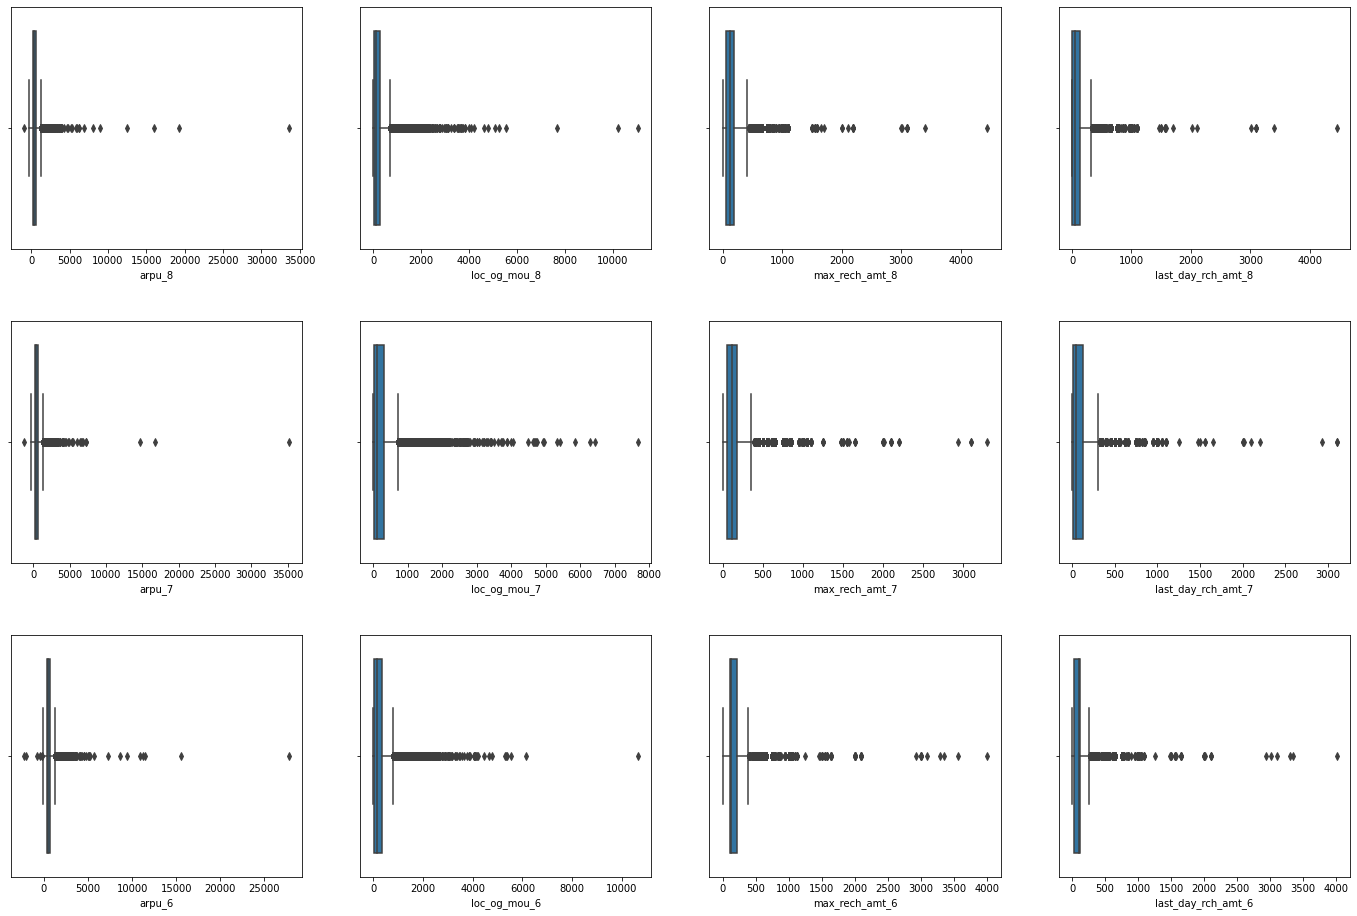

In [ ]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 
               'arpu_7', 'loc_og_mou_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 
               'arpu_6', 'loc_og_mou_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 
              #  'aon'
              ]

# Plot boxplots for each variable
fig, axes = plt.subplots(3, 4, figsize=(24, 16))
# sns.boxplot(x=churn_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 4)
    sns.boxplot(churn_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

> #### Observations
> * From the above plots we can define following upper limits to the sepected variables





In [ ]:
pd.DataFrame([('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ),
              ('arpu_7', 7000), ('loc_og_mou_7', 4000), ('max_rech_amt_7', 1000 ), ('last_day_rch_amt_7', 1000 ),
              ('arpu_6', 6000), ('loc_og_mou_6', 4000), ('max_rech_amt_6', 1000 ), ('last_day_rch_amt_6', 1000 ),
              ], columns={'Feature':0, 'Value':1}) 

,Feature,Value
0,arpu_8,7000
1,loc_og_mou_8,4000
2,max_rech_amt_8,1000
3,last_day_rch_amt_8,1000
4,arpu_7,7000
5,loc_og_mou_7,4000
6,max_rech_amt_7,1000
7,last_day_rch_amt_7,1000
8,arpu_6,6000
9,loc_og_mou_6,4000


> * We will make these changes post exploration of other features

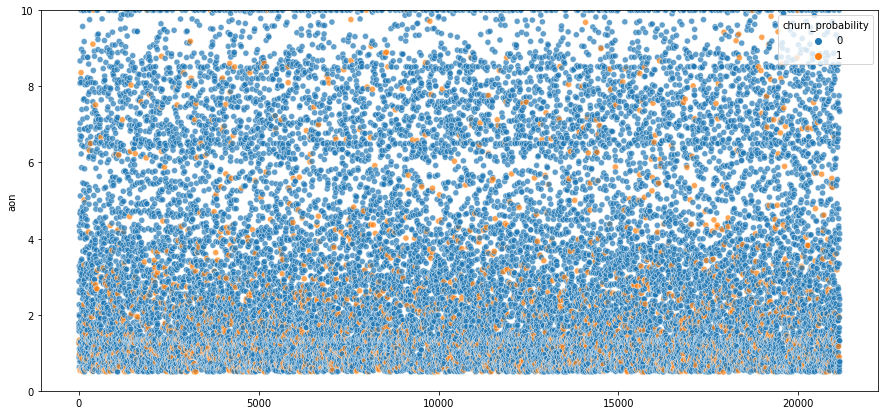

In [ ]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn_probability, alpha=0.7)
plt.ylim(0,10)
plt.show()

> #### Observation
> * Though we cannot see a clear pattern here, but we can notice that the mojority of churners had a tenure of less than 4 years

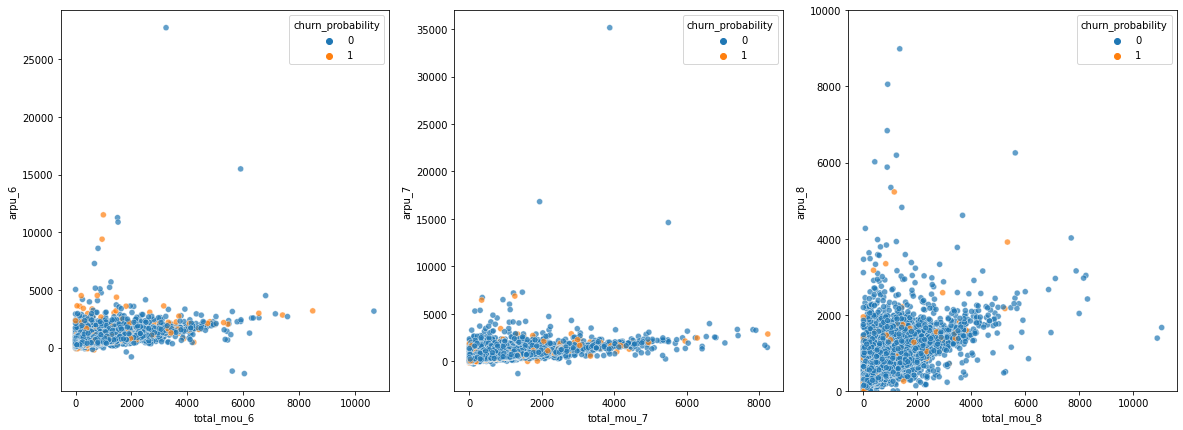

In [ ]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20, 7))
sns.scatterplot(y='arpu_6', x='total_mou_6', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_7', x='total_mou_7', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_data, ax=axes[2], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

> #### Observation
> * We can clearly see that MOU have dropped significantly for the churners in the 8th month, thus hitting the revenue generated from them
> * It is also interesting that though the MOU is between 0-4000, the revenue is highest in that region that tells us these users had other services that were boosting the revenue

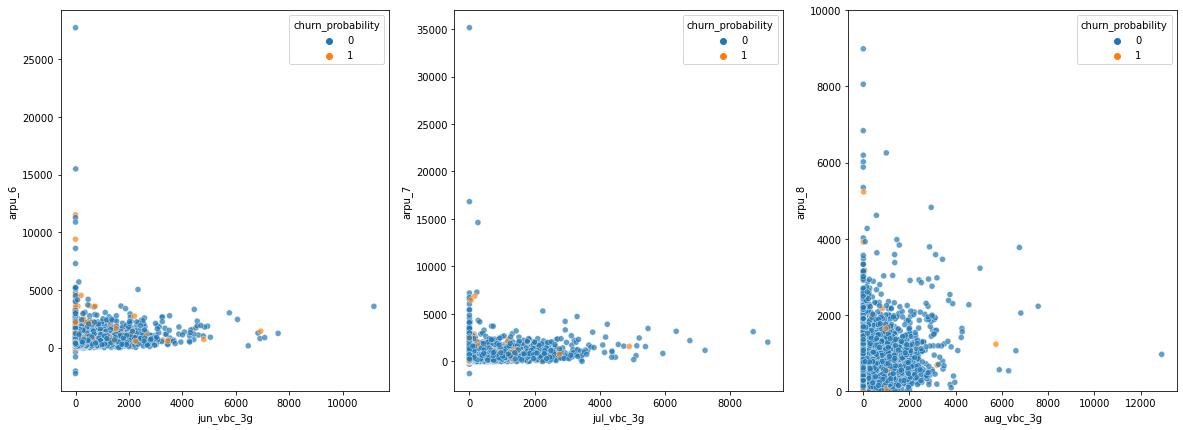

In [ ]:
# Lets check how the vbc effects the revenue
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20, 7))

sns.scatterplot(y='arpu_6', x='jun_vbc_3g', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_7', x='jul_vbc_3g', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='aug_vbc_3g', data=churn_data, ax=axes[2], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

 > #### Observation
 > * We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned
 > * Yet again we see that the revenue is higher towards the lesser consumption side

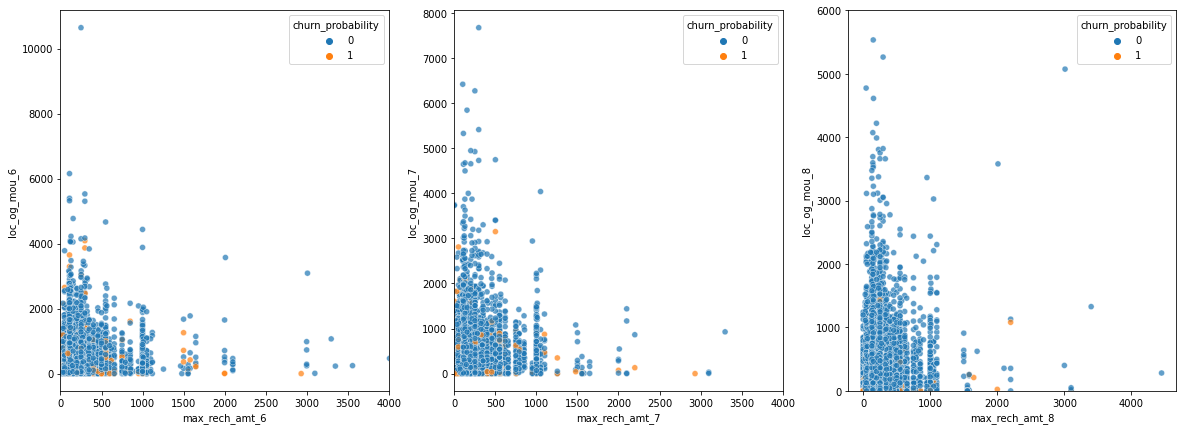

In [ ]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20, 7))

sns.scatterplot(x='max_rech_amt_6', y='loc_og_mou_6', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_7', y='loc_og_mou_7', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=churn_data, ax=axes[2], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

> #### Observations
> * Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
> * Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more 

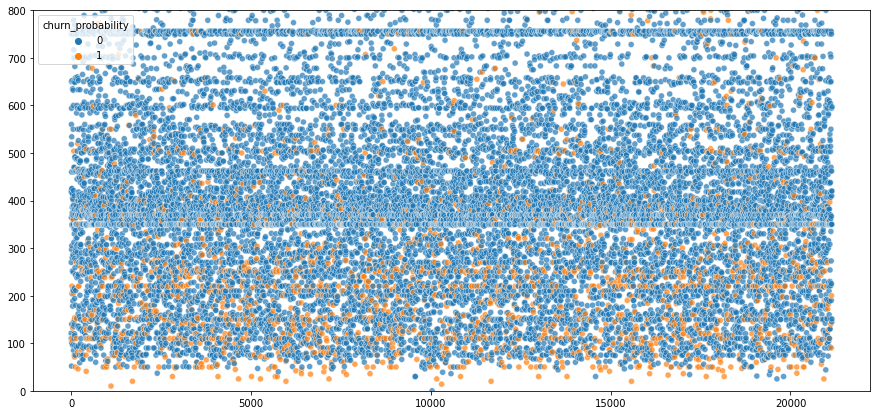

In [ ]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['max_rech_amt_6'] + churn_data['max_rech_amt_7'] + churn_data['max_rech_amt_8'],
                hue=churn_data['churn_probability'], alpha=0.7)
plt.ylim(0,800)
plt.show()


> #### Observation
> * We can see that users who had the max recharge amount less tha 300 churned more

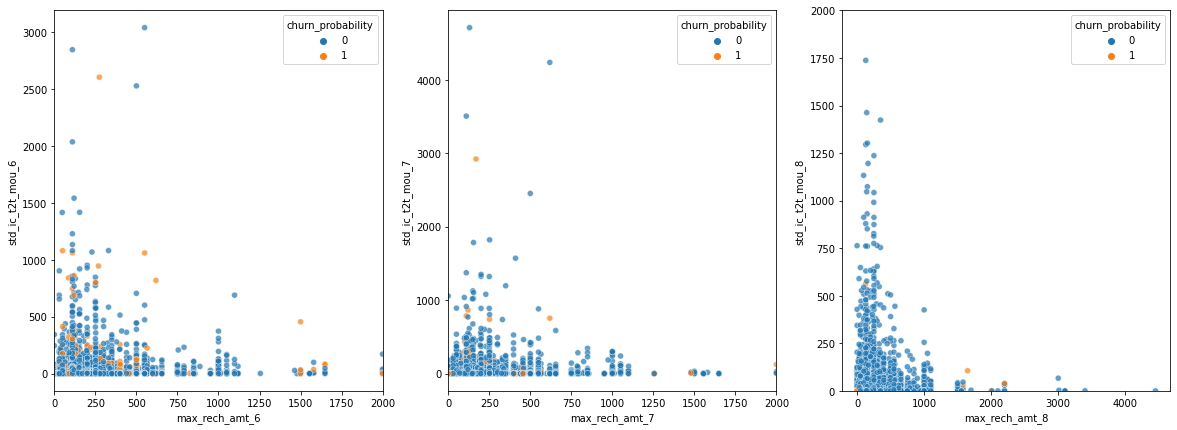

In [ ]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20, 7))
sns.scatterplot(x='max_rech_amt_6', y='std_ic_t2t_mou_6', data=churn_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_7', y='std_ic_t2t_mou_7', data=churn_data, ax=axes[1], hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=churn_data, ax=axes[2], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

> #### Observation
> * Users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more

In [ ]:
churn_data['churn_probability'].value_counts(normalize=True)

0    0.892471
1    0.107529
Name: churn_probability, dtype: float64

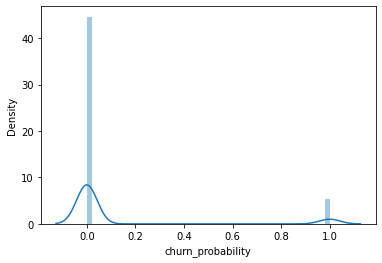

In [ ]:
# Distribution of target variable

sns.distplot(churn_data['churn_probability'])
plt.show()

> #### Observation
> * Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 89%
> * We will handle this imbalance using SMOTE algorithm

# Data Preperation

In [ ]:
# Cap the features with high outliers

col_upr_lmt = [
    #            ('aon', 3000)
               ('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ),
              ('arpu_7', 7000), ('loc_og_mou_7', 4000), ('max_rech_amt_7', 1000 ), ('last_day_rch_amt_7', 1000 ),
              ('arpu_6', 6000), ('loc_og_mou_6', 4000), ('max_rech_amt_6', 1000 ), ('last_day_rch_amt_6', 1000 ),
               ]

for col, value in col_upr_lmt:
    churn_data[col] = churn_data[col].apply(lambda x : x if x < value else value)

churn_data[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,arpu_7,loc_og_mou_7,max_rech_amt_7,last_day_rch_amt_7,arpu_6,loc_og_mou_6,max_rech_amt_6,last_day_rch_amt_6
0,101.565,15.76,30,30,128.191,25.94,41,10,240.708,58.91,50,25
1,24.690,0.00,0,0,18.310,1.44,0,0,445.826,89.89,110,98
2,392.024,55.23,50,0,397.946,21.79,110,0,439.919,44.01,110,110
3,191.780,118.34,150,150,205.397,120.28,120,120,340.266,139.68,150,110
4,338.286,385.26,250,250,377.294,366.79,250,150,580.549,327.46,250,0


In [ ]:
y = churn_data['churn_probability']
X = churn_data.drop('churn_probability', axis=1)

## Standardization

In [ ]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

## Handling Class Imbalance

In [ ]:
churn_data.churn_probability.value_counts()

0    18882
1     2275
Name: churn_probability, dtype: int64

In [ ]:
# Use SMOTE to take care of class imbalance

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
y_res.value_counts()

0    18882
1    18882
Name: churn_probability, dtype: int64

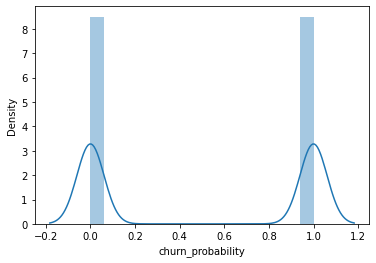

In [ ]:
sns.distplot(y_res)
plt.show()

> Now the class is balanced and the target variable is not skewed 

## PCA

In [ ]:
X.shape

(21157, 101)

In [ ]:
# Apply PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(37764, 47)

# Model Building

# 1.a Logistic Regression for Feature Selection

> For logistic regression we will be using the X and y without SMOTE so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn 

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [ ]:
import statsmodels.api as sm

In [ ]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                26434
Model:                            GLM   Df Residuals:                    26338
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 10 Aug 2022   Deviance:                          nan
Time:                        12:28:51   Pearson chi2:                 3.51e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.114e+

### RFE for Feature Selection

In [ ]:
# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 20 features
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['roam_og_mou_6', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_8',
       'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_8',
       'og_others_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'night_pck_user_8', 'fb_user_8', 'total_mou_6', 'total_mou_7',
       'total_mou_8'],
      dtype='object')

In [ ]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                26434
Model:                            GLM   Df Residuals:                    26413
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 10 Aug 2022   Deviance:                          inf
Time:                        12:36:19   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0088      0

In [ ]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.278006,0
1,0,0.892255,1
2,1,0.956717,1
3,1,0.769299,1
4,1,0.940310,1


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11257  1938]
 [ 1602 11637]]

Accuracy : 0.8660815616251797


In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,total_mou_6,278.07
4,std_og_mou_6,254.24
19,total_mou_8,132.89
5,std_og_mou_8,88.33
2,loc_og_mou_6,61.12
3,loc_og_mou_8,34.75
16,fb_user_8,17.46
15,night_pck_user_8,17.00
0,roam_og_mou_6,12.36
1,roam_og_mou_8,5.08


> Since the VIF for `total_mou_7` is very high we will drop it

In [ ]:
rfe_col = rfe_col.drop('total_mou_6', 1)

In [ ]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                26434
Model:                            GLM   Df Residuals:                    26414
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 10 Aug 2022   Deviance:                          inf
Time:                        12:40:50   Pearson chi2:                 9.01e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0001      0

In [ ]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.268356,0
1,0,0.889882,1
2,1,0.895752,1
3,1,0.782775,1
4,1,0.938599,1


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11129  2066]
 [ 1694 11545]]

Accuracy : 0.8577589468109253


In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,total_mou_8,91.98
5,std_og_mou_8,61.84
3,loc_og_mou_8,25.62
16,fb_user_8,17.46
15,night_pck_user_8,17.00
10,loc_ic_mou_8,4.02
1,roam_og_mou_8,3.92
9,loc_ic_mou_7,3.36
17,total_mou_7,3.32
4,std_og_mou_6,2.23


In [ ]:
# Drop 'total_mou_8' due to high VIF
rfe_col = rfe_col.drop('total_mou_8', 1)

In [ ]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                26434
Model:                            GLM   Df Residuals:                    26415
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9570.3
Date:                Wed, 10 Aug 2022   Deviance:                       19141.
Time:                        12:41:21   Pearson chi2:                 2.13e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2897      0

In [ ]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.268430,0
1,0,0.900822,1
2,1,0.876473,1
3,1,0.818368,1
4,1,0.951929,1


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11096  2099]
 [ 1691 11548]]

Accuracy : 0.8566240447907997


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,fb_user_8,17.46
15,night_pck_user_8,17.00
10,loc_ic_mou_8,4.00
9,loc_ic_mou_7,3.36
17,total_mou_7,3.32
3,loc_og_mou_8,3.04
5,std_og_mou_8,2.40
4,std_og_mou_6,2.23
2,loc_og_mou_6,2.14
13,total_rech_num_8,1.73


In [ ]:
# Drop 'fb_user_8'
rfe_col = rfe_col.drop('fb_user_8', 1)

In [ ]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                26434
Model:                            GLM   Df Residuals:                    26416
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9662.8
Date:                Wed, 10 Aug 2022   Deviance:                       19326.
Time:                        12:42:01   Pearson chi2:                 2.21e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2614      0

In [ ]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.313984,0
1,0,0.905948,1
2,1,0.873761,1
3,1,0.808898,1
4,1,0.954420,1


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11063  2132]
 [ 1650 11589]]

Accuracy : 0.8569266853294999


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,3.99
9,loc_ic_mou_7,3.36
16,total_mou_7,3.32
3,loc_og_mou_8,3.04
5,std_og_mou_8,2.39
4,std_og_mou_6,2.22
2,loc_og_mou_6,2.13
13,total_rech_num_8,1.73
7,isd_og_mou_8,1.60
6,isd_og_mou_6,1.59


> The VIF values looks good now, we can proceed further

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8753682302288692

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8384236453201971

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16157635467980297


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.8446177392318344


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8702115944308975


### Plotting ROC

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

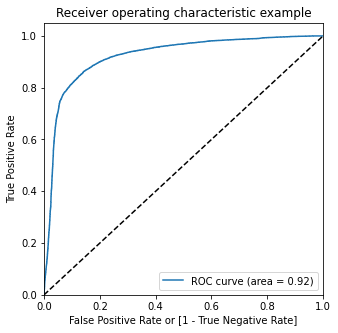

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal cutoff point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.313984,0,1,1,1,1,0,0,0,0,0,0
1,0,0.905948,1,1,1,1,1,1,1,1,1,1,1
2,1,0.873761,1,1,1,1,1,1,1,1,1,1,0
3,1,0.808898,1,1,1,1,1,1,1,1,1,1,0
4,1,0.954420,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500832  1.000000  0.000000
0.1   0.1  0.724635  0.972505  0.475938
0.2   0.2  0.784179  0.952640  0.615157
0.3   0.3  0.822880  0.932397  0.712997
0.4   0.4  0.846561  0.908075  0.784843
0.5   0.5  0.856927  0.875368  0.838424
0.6   0.6  0.859045  0.834957  0.883213
0.7   0.7  0.855981  0.795755  0.916408
0.8   0.8  0.834872  0.722789  0.947329
0.9   0.9  0.629341  0.279931  0.979917


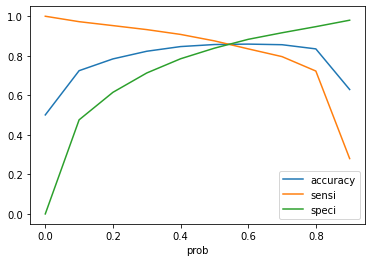

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

> The point 0.5 is optimal for our model, so we will keep that

In [ ]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
20650,1,0.001754,0
13411,0,0.000274,0
3848,0,0.607999,1
10821,0,0.022600,0
33354,1,0.920988,1


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[4740  947]
 [ 734 4909]]

Accuracy : 0.8516328331862313


In [ ]:
parameters = res.params[1:]

In [ ]:
# Top 10 predictors

abs(parameters).sort_values(ascending=False)[0:10]

loc_ic_mou_8          2.888878
loc_og_mou_8          1.110920
og_others_8           0.862145
loc_ic_mou_7          0.807226
spl_ic_mou_8          0.777561
night_pck_user_8      0.691842
total_rech_num_8      0.651348
std_og_mou_8          0.627278
last_day_rch_amt_8    0.531700
std_ic_mou_8          0.461505
dtype: float64

In [ ]:
pd.DataFrame(abs(parameters).sort_values(ascending=False)[0:10], columns={'Feature Importance':0})

,Feature Importance
loc_ic_mou_8,2.888878
loc_og_mou_8,1.110920
og_others_8,0.862145
loc_ic_mou_7,0.807226
spl_ic_mou_8,0.777561
night_pck_user_8,0.691842
total_rech_num_8,0.651348
std_og_mou_8,0.627278
last_day_rch_amt_8,0.531700
std_ic_mou_8,0.461505


> * So using Logistic regression we are geting an accuracy of 85.69% on test data
> * We can clearly see most of the critical features are form the 8th Month, which is inline with the bussiness understanding that action phase needs more attention

In [ ]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(6,5))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap); 
    # plt.savefig('/kaggle/working/img1.png')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 18,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [ ]:
def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(predictions, labels)
    print(matrix)
    print('\n')

    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

# 1.b Logistic Regression with PCA


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

[[4741  746]
 [ 946 4897]]


F1 Score: 0.8506982628218114


              precision    recall  f1-score   support

       False       0.83      0.86      0.85      5487
        True       0.87      0.84      0.85      5843

    accuracy                           0.85     11330
   macro avg       0.85      0.85      0.85     11330
weighted avg       0.85      0.85      0.85     11330



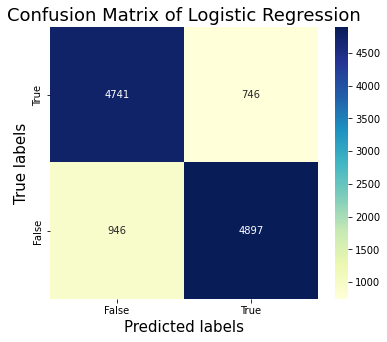

In [ ]:
# Initial Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

# Evaluate initial Logistic Regression model
cal_score(x_test=X_test,y_test=y_test,model=lr,name='Logistic Regression')

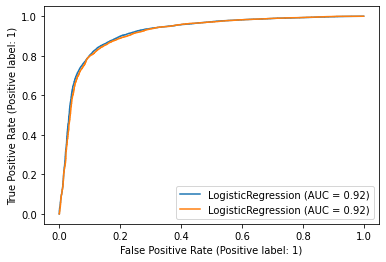

In [ ]:
# ROC curves for train and test set
fig = plot_roc_curve(lr, X_train, y_train)
fig = plot_roc_curve(lr, X_test, y_test, ax = fig.ax_)
plt.show()

### Hyper Parameter Tuning


In [ ]:
log_reg = LogisticRegression(random_state=25, n_jobs=-1)

# Create param grid.
param_grid = [
    {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
     }
]

# Create grid search object
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=True)

In [ ]:
log_reg_grid.best_score_

0.8542028251822498

In [ ]:
# Select best Logistic regression model
logr_best = log_reg_grid.best_estimator_
logr_best

LogisticRegression(C=0.08858667904100823, n_jobs=-1, penalty='l1',
                   random_state=25, solver='liblinear')

[[4731  749]
 [ 956 4894]]


F1 Score: 0.8495541254950327


              precision    recall  f1-score   support

       False       0.83      0.86      0.85      5480
        True       0.87      0.84      0.85      5850

    accuracy                           0.85     11330
   macro avg       0.85      0.85      0.85     11330
weighted avg       0.85      0.85      0.85     11330



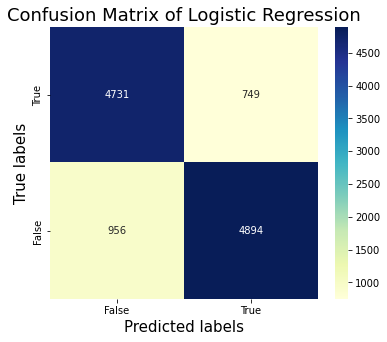

In [ ]:
# Evaluate best Logistic regression model
cal_score(x_test=X_test,y_test=y_test,model=logr_best,name='Logistic Regression')

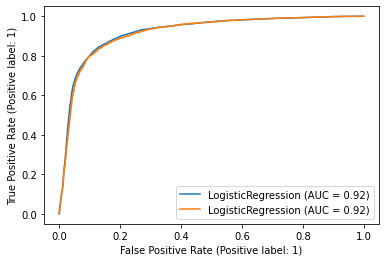

In [ ]:
# Plot ROC Curves
fig = plot_roc_curve(logr_best, X_train, y_train)
fig = plot_roc_curve(logr_best, X_test, y_test, ax = fig.ax_)
plt.show()

> We are getting an accuracy of **85%** on test data, with Logistic Regression

## 2. Decision Tree with PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

[[4675  538]
 [1012 5105]]


F1 Score: 0.8634125851689696


              precision    recall  f1-score   support

       False       0.82      0.90      0.86      5213
        True       0.90      0.83      0.87      6117

    accuracy                           0.86     11330
   macro avg       0.86      0.87      0.86     11330
weighted avg       0.87      0.86      0.86     11330



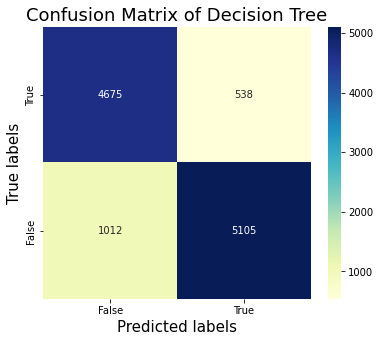

In [ ]:
# Initial decision tree classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# evaluate model
cal_score(x_test=X_test,y_test=y_test,model=intial_dt,name='Decision Tree')

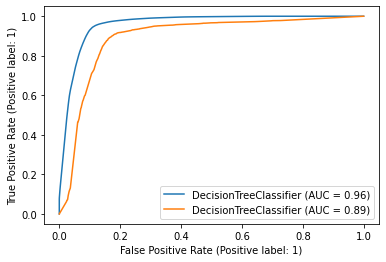

In [ ]:
# Plot ROC Curves
fig = plot_roc_curve(intial_dt, X_train, y_train)
fig = plot_roc_curve(intial_dt, X_test, y_test, ax = fig.ax_)
plt.show()

### Hyperparameter tuning

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8661571179534695

In [ ]:
# Select best Decision tree model
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

[[4811  473]
 [ 876 5170]]


F1 Score: 0.8810698946288952


              precision    recall  f1-score   support

       False       0.85      0.91      0.88      5284
        True       0.92      0.86      0.88      6046

    accuracy                           0.88     11330
   macro avg       0.88      0.88      0.88     11330
weighted avg       0.88      0.88      0.88     11330



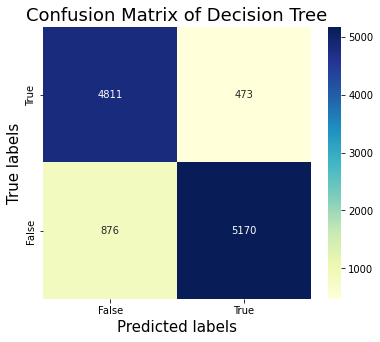

In [ ]:
# Evaluate best Decision tree model
cal_score(x_test=X_test,y_test=y_test,model=dt_best,name='Decision Tree')

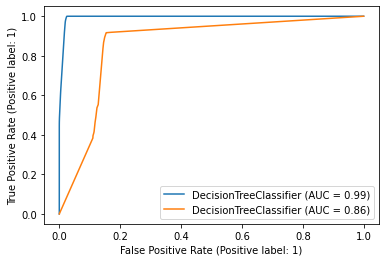

In [ ]:
# Plot ROC Curves 
fig = plot_roc_curve(dt_best, X_train, y_train)
fig = plot_roc_curve(dt_best, X_test, y_test, ax = fig.ax_)
plt.show()

> We are getting an accuracy of **88%** on test data, with decision tree

## 3. Random Forest with PCA

[[4950  526]
 [ 737 5117]]


F1 Score: 0.8885566430934844


              precision    recall  f1-score   support

       False       0.87      0.90      0.89      5476
        True       0.91      0.87      0.89      5854

    accuracy                           0.89     11330
   macro avg       0.89      0.89      0.89     11330
weighted avg       0.89      0.89      0.89     11330



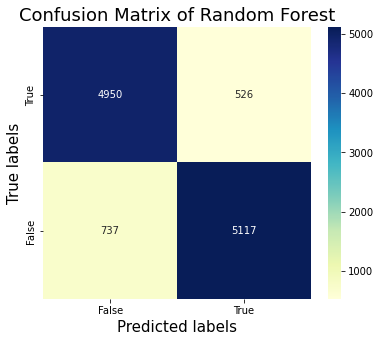

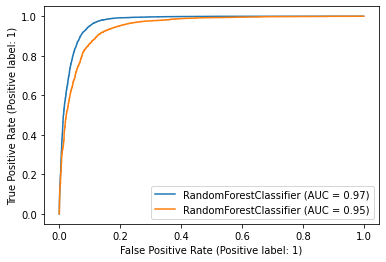

In [ ]:
# Initial Random Forest Model
initial_rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
initial_rf.fit(X_train, y_train)
cal_score(x_test=X_test,y_test=y_test,model=initial_rf,name='Random Forest')

# Plot ROC Curves
fig = plot_roc_curve(initial_rf, X_train, y_train)
fig = plot_roc_curve(initial_rf, X_test, y_test, ax = fig.ax_)
plt.show()

### Hyperparameter tuning

In [ ]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9141634250217162

In [ ]:
# Select best Random forest model
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

[[5171  375]
 [ 516 5268]]


F1 Score: 0.9213676026572192


              precision    recall  f1-score   support

       False       0.91      0.93      0.92      5546
        True       0.93      0.91      0.92      5784

    accuracy                           0.92     11330
   macro avg       0.92      0.92      0.92     11330
weighted avg       0.92      0.92      0.92     11330



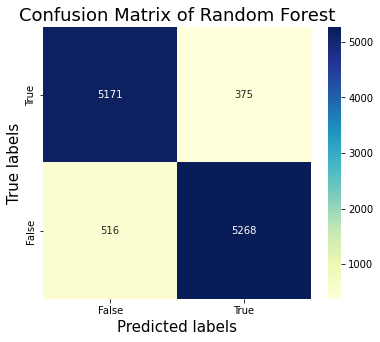

In [ ]:
# Evaluate best Random forest model
cal_score(x_test=X_test,y_test=y_test,model=rf_best,name='Random Forest')

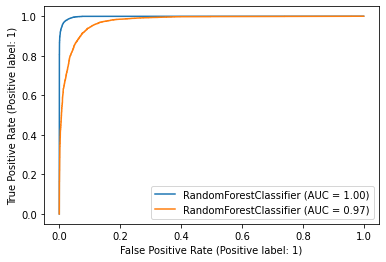

In [ ]:
# Plot ROC Curves
fig = plot_roc_curve(rf_best, X_train, y_train)
fig = plot_roc_curve(rf_best, X_test, y_test, ax = fig.ax_)
plt.show()

> We are getting an accuracy of **92**% on test data, with Random forest

## 4. XGBoost with PCA


[[4883  732]
 [ 804 4911]]


F1 Score: 0.8644328440093196


              precision    recall  f1-score   support

       False       0.86      0.87      0.86      5615
        True       0.87      0.86      0.86      5715

    accuracy                           0.86     11330
   macro avg       0.86      0.86      0.86     11330
weighted avg       0.86      0.86      0.86     11330



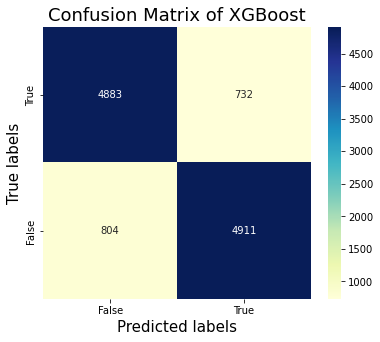

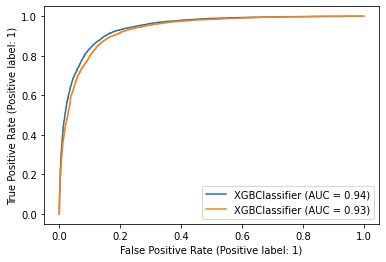

In [ ]:
# Initial XGBoost Model
xgb = XGBClassifier(objective = 'binary:logistic', random_state=25, n_jobs=-1)
xgb.fit(X_train,y_train)
cal_score(x_test=X_test,y_test=y_test,model=xgb,name='XGBoost')

# Plot ROC Curves
fig = plot_roc_curve(xgb, X_train, y_train)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)
plt.show()

### Hyperparameter Tuning

In [ ]:
from scipy import stats

xgb = XGBClassifier(objective = 'binary:logistic', random_state=25, n_jobs=-1)

# Define parameters
params = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

xgb_clf = RandomizedSearchCV(xgb, 
                         param_distributions = params,
                         cv = 5,  
                         scoring = 'accuracy', 
                        #  error_score = 0, 
                         verbose = 1, 
                         n_jobs = -1)

xgb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(n_jobs=-1, random_state=25),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f193e999890>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f193e8e4550>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f193e8396d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f193e999b10>},
                   scoring='accuracy', verbose=1)

In [ ]:
xgb_clf.best_score_

0.9471892199693691

In [ ]:
# Select Best XGBoost Model
xgb_best = xgb_clf.best_estimator_
xgb_best

XGBClassifier(colsample_bytree=0.8126744872571807,
              learning_rate=0.09822748805095151, max_depth=9,
              min_child_weight=2, n_estimators=541, n_jobs=-1, random_state=25,
              subsample=0.8157239216995218)

[[5258  118]
 [ 429 5525]]


F1 Score: 0.9517523415956632


              precision    recall  f1-score   support

       False       0.92      0.98      0.95      5376
        True       0.98      0.93      0.95      5954

    accuracy                           0.95     11330
   macro avg       0.95      0.95      0.95     11330
weighted avg       0.95      0.95      0.95     11330



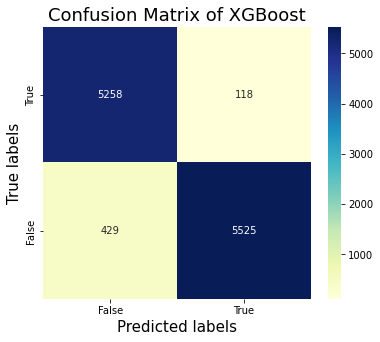

In [ ]:
# Evaluate Best XGBoost Model
cal_score(x_test=X_test,y_test=y_test,model=xgb_best,name='XGBoost')

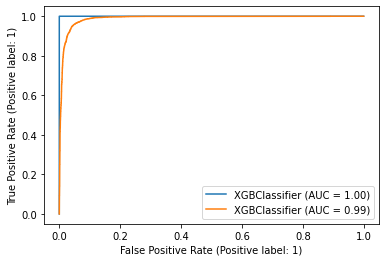

In [ ]:
# Plot ROC Curves
fig = plot_roc_curve(xgb_best, X_train, y_train)
fig = plot_roc_curve(xgb_best, X_test, y_test, ax = fig.ax_)
plt.show()

> We are getting an accuracy of **95**% on test data, with XGBoost

# Conclusions

* According to our problem statement, we need to retain high value customers, since retaining customers require less budget than attracting new ones.

* To retain such customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

* When we compare the models trained we can see the tuned XGBoost is performing the best, which has highest accuracy along with highest recall i.e. both 95% respectively. So, we will go with XGBoost, as it is giving the best results among all.

## Strategies to Manage Customer Churn

The top 10 predictors are :

| Features |
| ---------- |
loc_ic_mou_8        
loc_og_mou_8          
og_others_8          
loc_ic_mou_7         
spl_ic_mou_8          
night_pck_user_8      
total_rech_num_8      
std_og_mou_8          
last_day_rch_amt_8    
std_ic_mou_8                
           

* Here, we can see that most of the top predictors are from the 8th Month i.e. August, as the drop in engagement is prominent in that phase.

Some of the factors noticed while performing EDA which can be added with these inshigts are:
1. Users whose maximum recharge amount is less than 300, should have a tag and re-evaluated time to time as they are more likely to churn.
2. Users that have been with the network less than 4 years, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 years tend to churn more.
3. MOU is definitely one of the major factors, but recharge related features like night pack and last day recharge amount are also important. 

# Predictions on the Test Dataset

In [ ]:
# Read test file
test_df = pd.read_csv('test (1).csv')

In [ ]:
# Read solution and data dictionary files
sol_df = pd.read_csv('solution (1).csv')
dict_df = pd.read_csv('data_dictionary.csv')

In [ ]:
# Getting id column from test file
a = test_df['id']

In [ ]:
# calculate that total recharge amount for data
test_df['total_data_rech_amt_6'] = test_df['av_rech_amt_data_6'] * test_df['total_rech_data_6']
test_df['total_data_rech_amt_7'] = test_df['av_rech_amt_data_7'] * test_df['total_rech_data_7']
test_df['total_data_rech_amt_8'] = test_df['av_rech_amt_data_8'] * test_df['total_rech_data_8']

In [ ]:
# Derive new feature total_mou by clubbing onnet and offet
test_df['total_mou_6'] = test_df['onnet_mou_6'] + test_df['offnet_mou_6']
test_df['total_mou_7'] = test_df['onnet_mou_7'] + test_df['offnet_mou_7']
test_df['total_mou_8'] = test_df['onnet_mou_8'] + test_df['offnet_mou_8']

In [ ]:
# Imputing zeroes for all recharge columns
test_df[rech_col]=test_df[rech_col].apply(lambda x: x.fillna(0))

In [ ]:
# # Imputing missing categories as -1
test_df[col_categorical]=test_df[col_categorical].apply(lambda x: x.fillna(-1))

In [ ]:
# Fetching columns from original dataset
test_df = test_df[X.columns]

In [ ]:
# Checking null values
for col in test_df.columns:
    null_col = test_df[col].isnull().sum() / test_df.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

id : 0.00
arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
roam_ic_mou_6 : 3.90
roam_ic_mou_7 : 3.91
roam_ic_mou_8 : 5.58
roam_og_mou_6 : 3.90
roam_og_mou_7 : 3.91
roam_og_mou_8 : 5.58
loc_og_t2c_mou_6 : 3.90
loc_og_t2c_mou_7 : 3.91
loc_og_t2c_mou_8 : 5.58
loc_og_mou_6 : 3.90
loc_og_mou_7 : 3.91
loc_og_mou_8 : 5.58
std_og_t2f_mou_6 : 3.90
std_og_t2f_mou_7 : 3.91
std_og_t2f_mou_8 : 5.58
std_og_mou_6 : 3.90
std_og_mou_7 : 3.91
std_og_mou_8 : 5.58
isd_og_mou_6 : 3.90
isd_og_mou_7 : 3.91
isd_og_mou_8 : 5.58
spl_og_mou_6 : 3.90
spl_og_mou_7 : 3.91
spl_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
loc_ic_mou_6 : 3.90
loc_ic_mou_7 : 3.91
loc_ic_mou_8 : 5.58
std_ic_t2t_mou_6 : 3.90
std_ic_t2t_mou_7 : 3.91
std_ic_t2t_mou_8 : 5.58
std_ic_t2f_mou_6 : 3.90
std_ic_t2f_mou_7 : 3.91
std_ic_t2f_mou_8 : 5.58
std_ic_mou_6 : 3.90
std_ic_mou_7 : 3.91
std_ic_mou_8 : 5.58
spl_ic_mou_6 : 3.90
spl_ic_mou_7 : 3.91
spl_ic_mou_8 : 5.58
isd_ic_mou_6 : 3.90
isd_ic_mou_7 : 3.91
isd_ic_mou_8 : 5.

In [ ]:
# Imputing missing values with mode
for col in test_df.columns:
    null_col = test_df[col].isnull().sum() / test_df.shape[0] * 100
    if null_col > 0:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [ ]:
# Rechecking null values
test_df.isnull().sum().sum()

0

In [ ]:
# Apply scaling on test dataset
final_normalized_x_test = pd.DataFrame(scaler.transform(test_df),columns = test_df.columns)

In [ ]:
# Making predictions on test dataset
probabilities = xgb_best.predict(pca.transform(final_normalized_x_test))

In [ ]:
# Create submission dataframe
submission = pd.DataFrame({'id':a,'churn_probability':probabilities})

In [ ]:
submission

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [ ]:
# Save submission to csv file
submission.to_csv('Submission.csv',index=False)